## Final Project Submission

Please fill out:
* Student name: Collins Kiptoo Kiprotich
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# PROJECT: [House_Prediction_Analysis]

## Table of Contents


1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Data Analysis
5. Modelling
6. Reccomendations and Conclusion

# 1. BUSINESS UNDERSTANDING

### 1.1. UNDERSTANDING THE PROBLEM

The role assumed here is that of a Data Scientist working for a real estate company. With the current price flutuations in the house market, my role is to build a machine learning model that will help homeowners gauge the house prices before they decide to either buy or sell their homes. 


### 1.2. OBJECTIVES


1. Build a model using the data given, that will predict house prices.
2. Determine which factors heavily influence house prices.
3. Suggest areas in which to focus research on.


# 2. DATA UNDERSTANDING

### 2.1. Data Collection


This data set was provided by Moringa School for use in our project.

### 2.2 Data Description

In [1]:
# Importing Dependancies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from matplotlib import style
style.use('seaborn-darkgrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

To get an understanding of how our data looks like, the first thing to do is to scheme over it so as to determine which data sets will be most useful in building our model

In [2]:
#Processing the data

data = pd.read_csv("data/kc_house_data.csv")
data.head()


id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0      5650     1.0        NaN  NONE  ...      7 Average       1180   
1      7242     2.0         NO  NONE  ...      7 Average       2170   
2     10000     1.0         NO  NONE  ...  6 Low Average        770   
3      5000     1.0         NO  NONE  ...      7 Average       1050   
4      8080     1.0         NO  NONE  ...         8 Good       1680   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0            0.0     1955           0.0    98178  47.5112 -122.257   
1          400.0     1951        1991.0    98125  47.7210 -122.319   
2            0.0     1933           NaN    98028  47.7379 -122.233   
3          910.0     1965           0.0    98136  47.5208 -122.393   
4            0.0     1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

In [3]:
#Checking the columns in the dataset
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### 2.3 Feature Columns
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

# 3. DATA PREPARATION

Now that I have an understanding on how our available data looks like, I shall choose the dataset that will help me in my model

From the above columns, it is evident that `id` is unique for every home and will therefore not affect the price. As a result, it wont be needed in our analysis.

In [4]:
data.drop('id', axis = 1, inplace = True)

In [5]:
#Checking for duplicate value
row,col = data.shape

data.drop_duplicates(inplace=True)

if data.shape==(row,col):
    print('The dataset doesn\'t have any duplicates')
else:
    print('The dataset have duplicates')

The dataset doesn't have any duplicates


In [6]:
# Checking for null values
data.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

As we can see, 3 columns have null values. For view, I shall replace the null values with the mode. As for waterfront and yr_renovated, I shall drop them since I will not use them in building my model.

In [7]:
# Filling the null values in view
data['view'] = data['view'].fillna(data['view'].mode()[0])

In [8]:
#Getting an overall description of the data
data.describe().T

count           mean            std         min          25%  \
price          21597.0  540296.573506  367368.140101  78000.0000  322000.0000   
bedrooms       21597.0       3.373200       0.926299      1.0000       3.0000   
bathrooms      21597.0       2.115826       0.768984      0.5000       1.7500   
sqft_living    21597.0    2080.321850     918.106125    370.0000    1430.0000   
sqft_lot       21597.0   15099.408760   41412.636876    520.0000    5040.0000   
floors         21597.0       1.494096       0.539683      1.0000       1.0000   
sqft_above     21597.0    1788.596842     827.759761    370.0000    1190.0000   
yr_built       21597.0    1970.999676      29.375234   1900.0000    1951.0000   
yr_renovated   17755.0      83.636778     399.946414      0.0000       0.0000   
zipcode        21597.0   98077.951845      53.513072  98001.0000   98033.0000   
lat            21597.0      47.560093       0.138552     47.1559      47.4711   
long           21597.0    -122.213982       0.140724   -122.5190    -122.3280   
sqft_living15  21597.0    1986.620318     685.230472    399.0000    1490.0000   
sqft_lot15     21597.0   12758.283512   27274.441950    651.0000    5100.0000   

                       50%         75%           max  
price          450000.0000  645000.000  7.700000e+06  
bedrooms            3.0000       4.000  3.300000e+01  
bathrooms           2.2500       2.500  8.000000e+00  
sqft_living      1910.0000    2550.000  1.354000e+04  
sqft_lot         7618.0000   10685.000  1.651359e+06  
floors              1.5000       2.000  3.500000e+00  
sqft_above       1560.0000    2210.000  9.410000e+03  
yr_built         1975.0000    1997.000  2.015000e+03  
yr_renovated        0.0000       0.000  2.015000e+03  
zipcode         98065.0000   98118.000  9.819900e+04  
lat                47.5718      47.678  4.777760e+01  
long             -122.2310    -122.125 -1.213150e+02  
sqft_living15    1840.0000    2360.000  6.210000e+03  
sqft_lot15       7620.0000   10083.000  8.712000e+05

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  object 
 8   view           21597 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

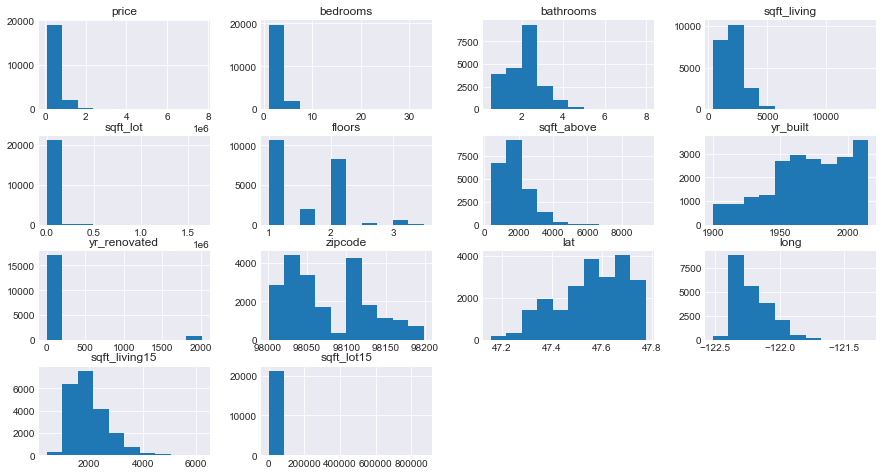

In [10]:
# To show the distribution of our data
data.hist(figsize = (15, 8))
plt.show()

Next, we have to remove some character columns which may disrupt our regression model and will not be useful in building mu model.

In [11]:
data.drop(['sqft_basement','yr_renovated','zipcode', "waterfront", 'sqft_lot15', "sqft_lot15"], axis = 1, inplace = True)

In [12]:
#Dropping null values
data.dropna(inplace = True)

# 4. DATA ANALYSIS

## 4.1 Univariate Analysis

### 4.1.1 Analysing Price (Numerical)

Given we're supposed to build a model that will predict the price, it it necessary to probe it for further understanding

In [13]:
#descriptive statistics summary
data['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [14]:
print(f"The most expensive house cost :{data['price'].max()}")
print(f"The cheapest house cost :{data['price'].min()}")
print(f"The average house price is :{round(data['price'].mean(), 2)}")

The most expensive house cost :7700000.0
The cheapest house cost :78000.0
The average house price is :540296.57


In [15]:
# Checking for correlation
data.corr()["price"].sort_values()

long             0.022036
yr_built         0.053953
sqft_lot         0.089876
floors           0.256804
lat              0.306692
bedrooms         0.308787
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

`sqft_living`, `sqft_above`, `sqft_living15` and `bathrooms` have a correlation with price that's aboce 50%

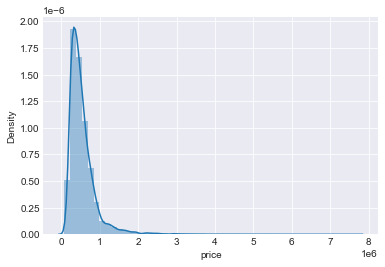

In [16]:
#histogram
sns.distplot(data['price']);

In [17]:
# The price is skewed.
#skewness and kurtosis
print("Skewness: %f" % data['price'].skew())
print("Kurtosis: %f" % data['price'].kurt())

Skewness: 4.023365
Kurtosis: 34.541359


Given this distribution is skewed, I shall therefore not remove the outliers as it might likely reduce the accuracy of my model

### 4.1.2 Analysing Condition (Categorical)

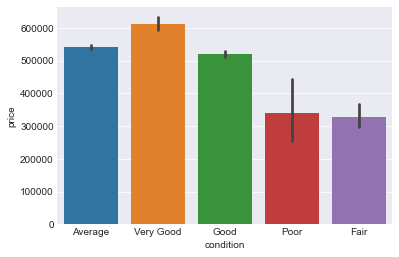

In [18]:
#Effect of house condition on the price
sns.barplot(x='condition',y='price',data=data);

As can be seen, houses in very good condition fetched the highest price while houses in fair and poor constions fetched the lowest price. 
It is therefore safe to infer that price is directly proportional to the condition of the house.

# 4.2 Bivariate Analysis

###  Geographical Location

This will help use dettermine the effect of location on the price. The question it should answer is: Are there locations in our data set where prices are generally higher than other places?

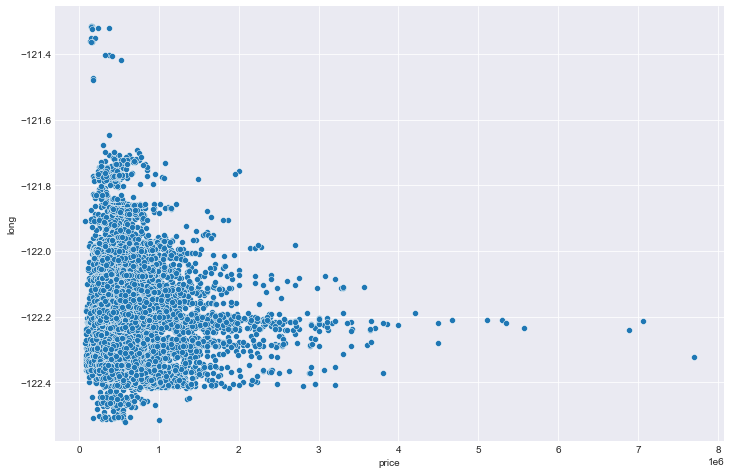

In [19]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=data);

<AxesSubplot:xlabel='price', ylabel='lat'>

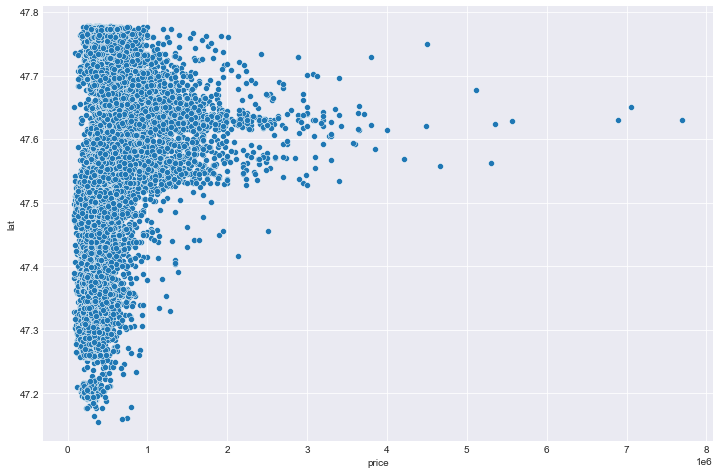

In [20]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data=data)

<AxesSubplot:xlabel='long', ylabel='lat'>

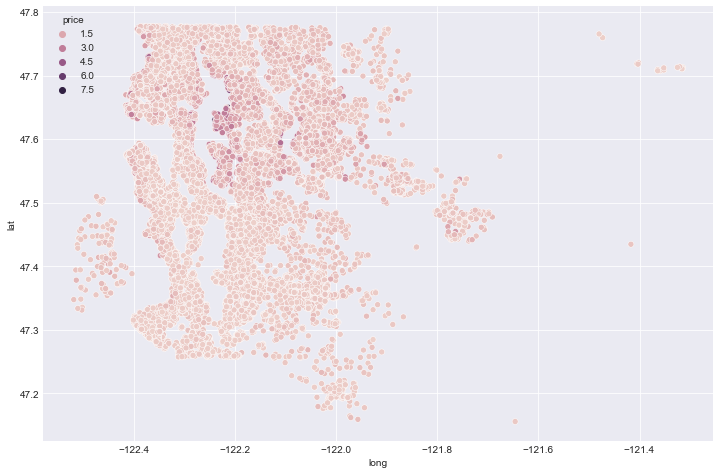

In [21]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=data,hue='price')

From the above viz, it's safe to assume that prices in this area are generally the same and that there are no affluent neighbourhoods

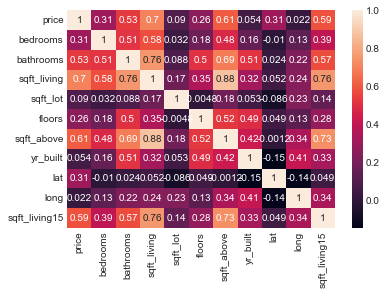

In [22]:
#To visualize the correlation of the data, I shall use a heatmap.
sns.heatmap(data.corr(), annot=True);

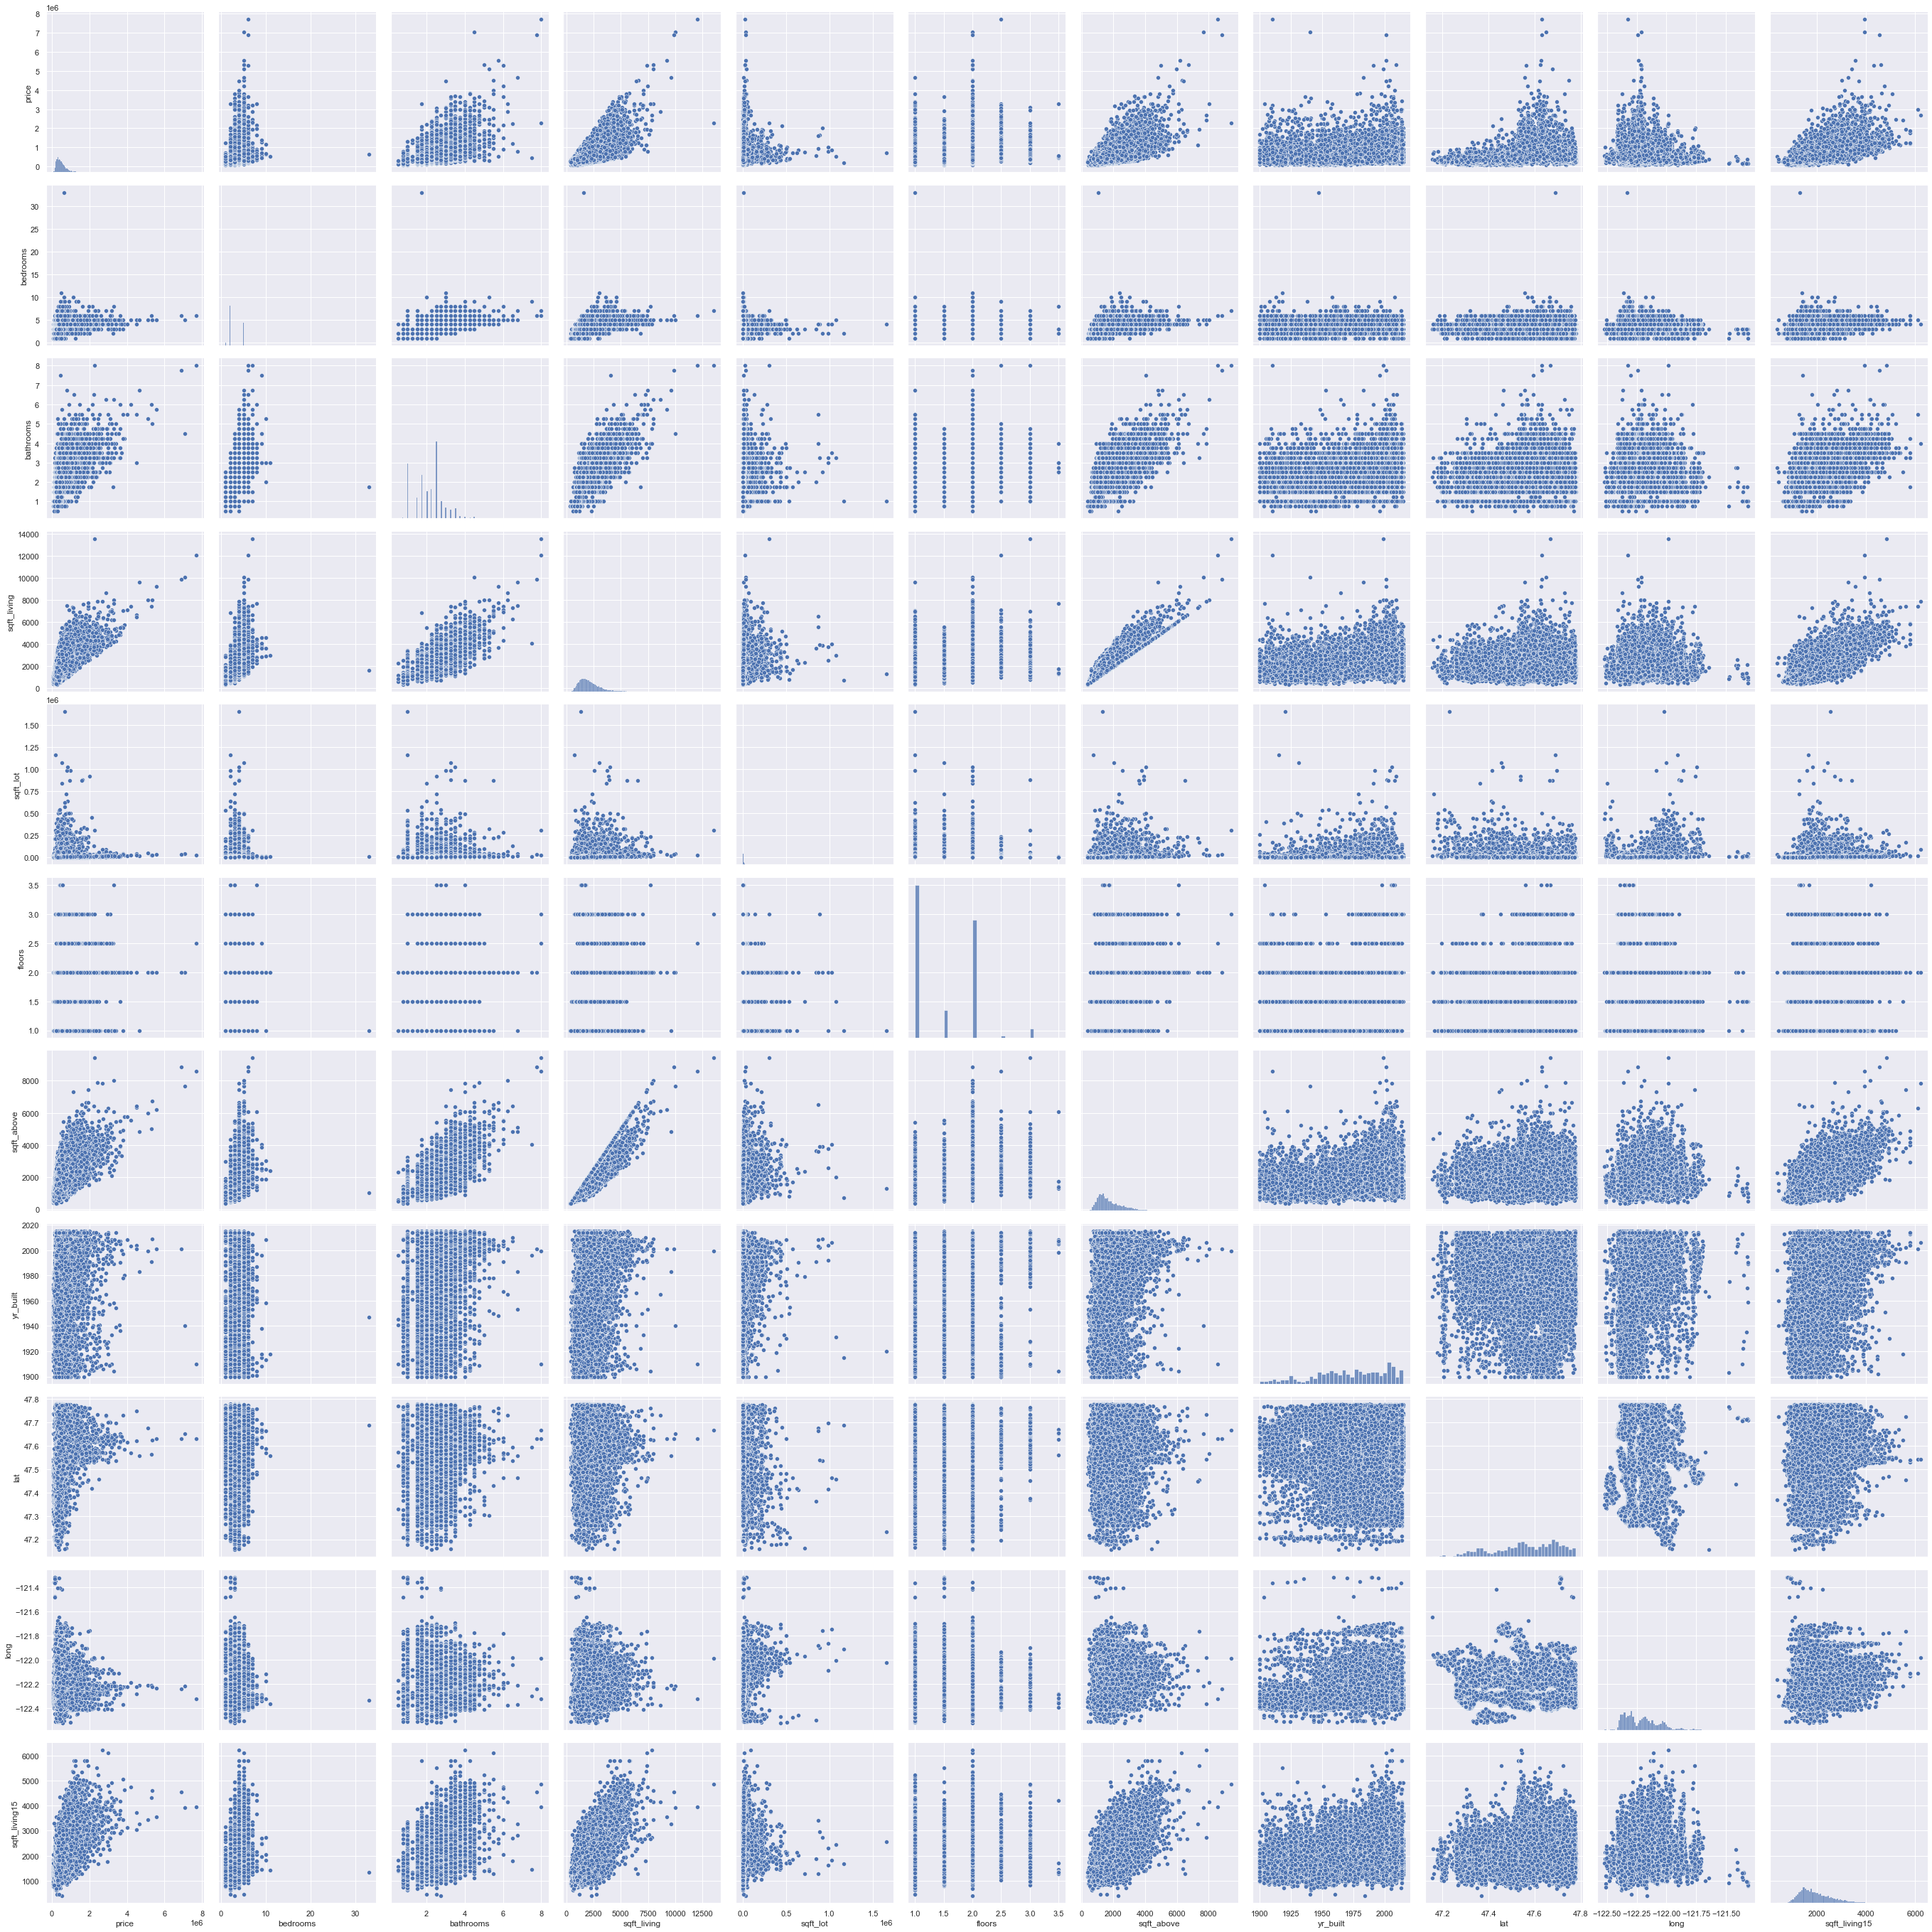

In [23]:
#Plot pairwise relationships in a dataset.
sns.set()
sns.pairplot(data, height = 3.5)
plt.show()

Next, we have to remove some character columns which may disrupt our regression model.

### Feature Engineering from Date


This is done to determine how the season in which the house was sold affects the price

In [24]:
data['date'] = pd.to_datetime(data['date'])

In [25]:
data['month'] = data['date'].apply(lambda date:date.month)

In [26]:
data['year'] = data['date'].apply(lambda date:date.year)

In [27]:
data['year'].value_counts().to_frame()

year
2014  14622
2015   6975

As can be seen, our data set has only houses sold in 2014 and 2015

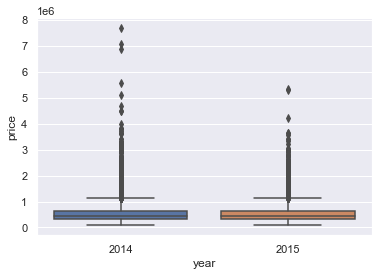

In [28]:
#Checking the prices per year
sns.boxplot(x='year',y='price',data=data);

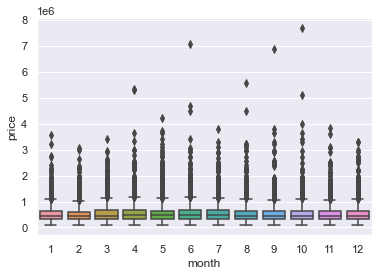

In [29]:
# Checking house prices per month
sns.boxplot(x='month',y='price',data=data);

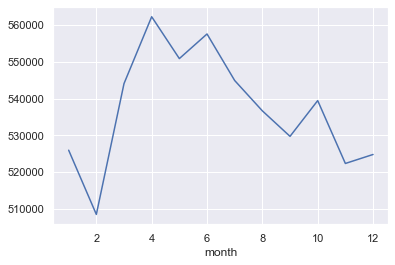

In [30]:
#Checking house price fluctiations per month
data.groupby('month').mean()['price'].plot();

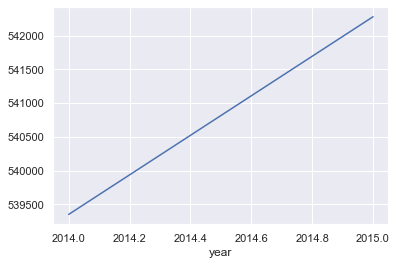

In [31]:
#Checking house price fluctuations over the 2 years
data.groupby('year').mean()['price'].plot();

As can be seen, there has been a consistent increase in house prices over the 2 years.

In [32]:
# A function to detrmine the season the house was sold
def find_season(month):
    
    '''
    A function to determine the season in which the house was sold
    '''
    
    hemisphere = 'Northern'
    if hemisphere == 'Northern':
        season_month_south = {
            12:'Summer', 1:'Summer', 2:'Summer',
            3:'Autumn', 4:'Autumn', 5:'Autumn',
            6:'Winter', 7:'Winter', 8:'Winter',
            9:'Spring', 10:'Spring', 11:'Spring'}
        return season_month_south.get(month)
season_list = []
for month in data['month']:
    season = find_season(month)
    season_list.append(season)
 # Creating a new column in the data set to show season sold.   
data['season'] = season_list
data.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0 2014-10-13  221900.0         3       1.00         1180      5650     1.0   
1 2014-12-09  538000.0         3       2.25         2570      7242     2.0   
2 2015-02-25  180000.0         2       1.00          770     10000     1.0   
3 2014-12-09  604000.0         4       3.00         1960      5000     1.0   
4 2015-02-18  510000.0         3       2.00         1680      8080     1.0   

   view  condition          grade  sqft_above  yr_built      lat     long  \
0  NONE    Average      7 Average        1180      1955  47.5112 -122.257   
1  NONE    Average      7 Average        2170      1951  47.7210 -122.319   
2  NONE    Average  6 Low Average         770      1933  47.7379 -122.233   
3  NONE  Very Good      7 Average        1050      1965  47.5208 -122.393   
4  NONE    Average         8 Good        1680      1987  47.6168 -122.045   

   sqft_living15  month  year  season  
0           1340     10  2014  Spring  
1           1690     12  2014  Summer  
2           2720      2  2015  Summer  
3           1360     12  2014  Summer  
4           1800      2  2015  Summer

Having determined the season, the data column becomes redundant as it shall be represented by the season. I shall therefore drop it.


In [33]:
data = data.drop('date',axis=1)

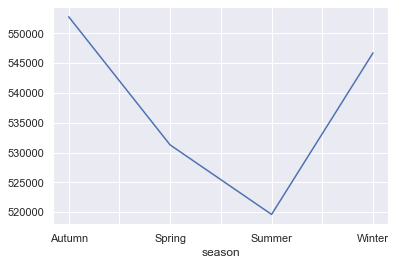

In [34]:
data.groupby('season').mean()['price'].plot();

It's clear that house prices are the lowest in summer and highest in Autumn

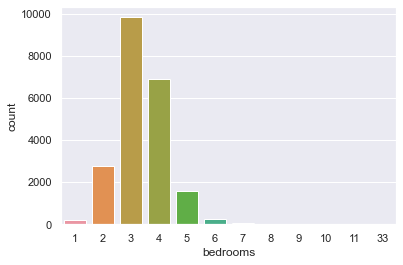

In [35]:
# To visualize the average number of bedrooms
sns.countplot(data['bedrooms']);
#Its evident that most houses have 3 or 4 bedrooms

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

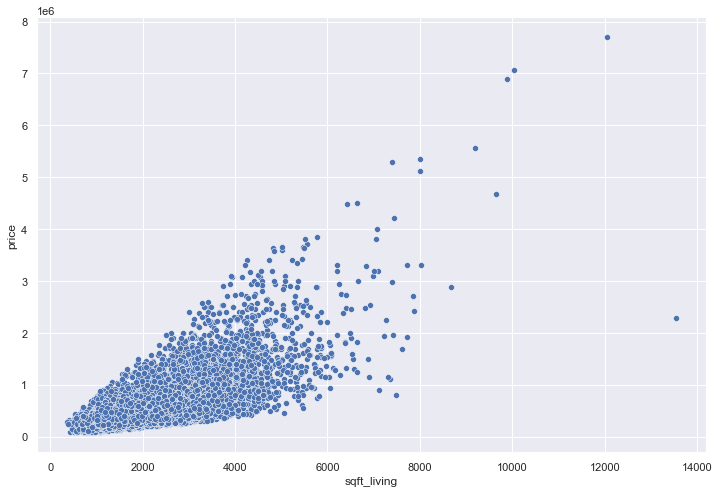

In [36]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='sqft_living',y='price',data=data)

From the visualization above, we can see that there are outliers in our data which can affect the model. I shall therefore remove outliers so as to improve the accuracy of our model.

#### Checking for Outliers

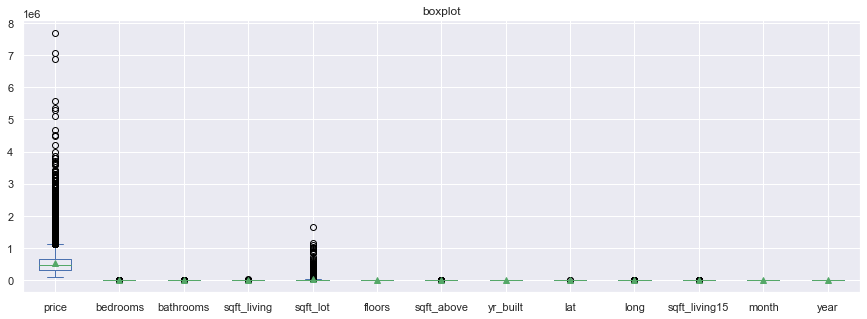

In [37]:
#To visualize the outliers using boxplots
ax = data.plot(kind='box', title='boxplot', showmeans=True, figsize = (15, 5))

In [38]:
# Removing Outliers
df = data.copy()

for i in ['bedrooms','sqft_living', 'sqft_above','floors','bathrooms', 'sqft_living15']:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    df = df[df[i] <= (Q3+(1.5*IQR))]
    df = df[df[i] >= (Q1-(1.5*IQR))]
    df = df.reset_index(drop=True)
    
display(df.head())

print('Before removal of outliers, The dataset had {} samples.'.format(data.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(df.shape[0]))

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  view  \
0  221900.0         3       1.00         1180      5650     1.0  NONE   
1  538000.0         3       2.25         2570      7242     2.0  NONE   
2  180000.0         2       1.00          770     10000     1.0  NONE   
3  604000.0         4       3.00         1960      5000     1.0  NONE   
4  510000.0         3       2.00         1680      8080     1.0  NONE   

   condition          grade  sqft_above  yr_built      lat     long  \
0    Average      7 Average        1180      1955  47.5112 -122.257   
1    Average      7 Average        2170      1951  47.7210 -122.319   
2    Average  6 Low Average         770      1933  47.7379 -122.233   
3  Very Good      7 Average        1050      1965  47.5208 -122.393   
4    Average         8 Good        1680      1987  47.6168 -122.045   

   sqft_living15  month  year  season  
0           1340     10  2014  Spring  
1           1690     12  2014  Summer  
2           2720      2  2015  Summer  
3           1360     12  2014  Summer  
4           1800      2  2015  Summer

Before removal of outliers, The dataset had 21597 samples.
After removal of outliers, The dataset now has 19801 samples.


### 4.2.2 Relationship with numerical variables

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

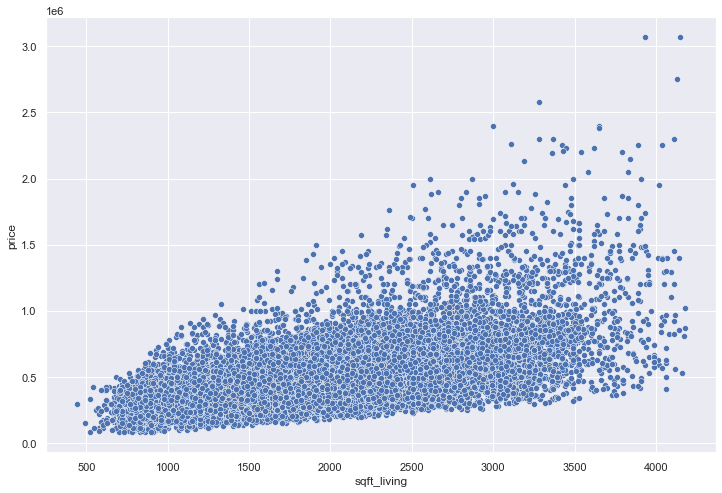

In [39]:
#sqft_living
plt.figure(figsize=(12,8))
sns.scatterplot(x='sqft_living',y='price',data=df)

This shows that these two have a linear relationship

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

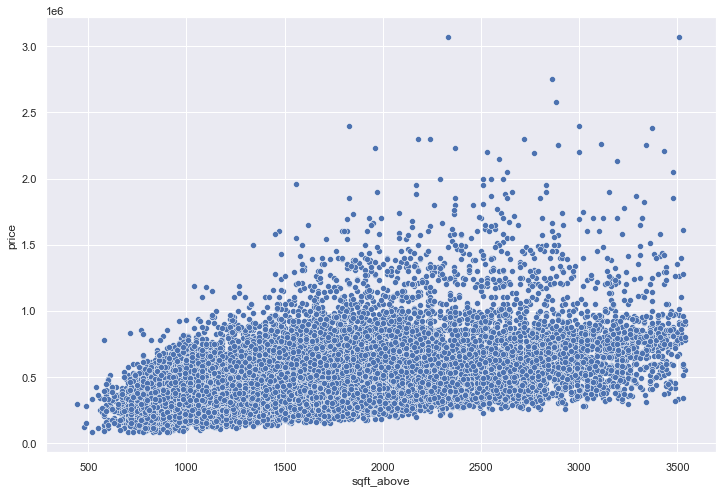

In [40]:
#'sqft_lot'
plt.figure(figsize=(12,8))
sns.scatterplot(x='sqft_above',y='price',data=df)

<AxesSubplot:xlabel='sqft_living15', ylabel='price'>

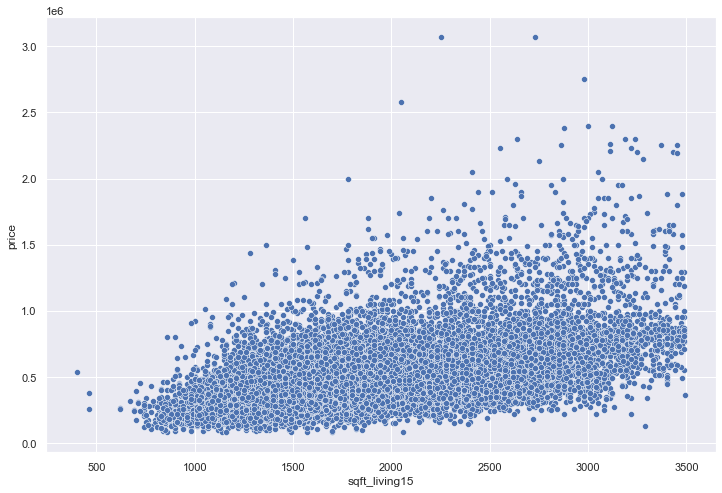

In [41]:
#'sqft_living15'
plt.figure(figsize=(12,8))
sns.scatterplot(x='sqft_living15',y='price',data=df)

For numerical variables,  we can see that they are all positively correlated with the price and have no noise since we removed the outliers.

### 4.2.3 Relationship with categorical variables

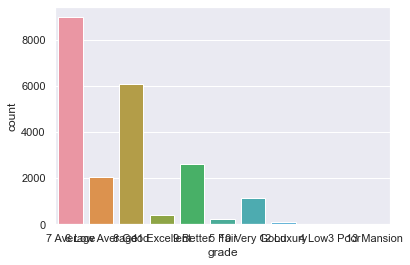

In [42]:
#Grade Distribution
sns.countplot(data['grade']);

In [43]:
df['grade'].value_counts().to_frame()

grade
7 Average       8775
8 Good          5872
9 Better        2279
6 Low Average   1952
10 Very Good     641
5 Fair           202
11 Excellent      63
4 Low             15
12 Luxury          2

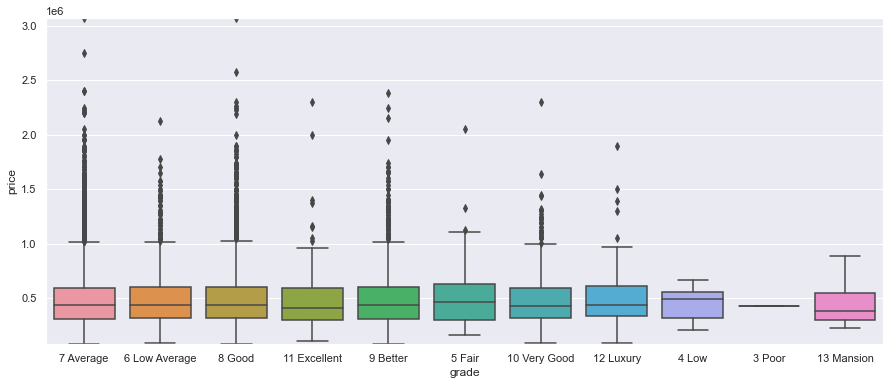

In [44]:
#Grade
var = 'grade'
d = pd.concat([data['grade'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(15, 6))
fig = sns.boxplot(x=var, y=df["price"], data=data)
fig.axis(ymin=df["price"].min(), ymax=df["price"].max());

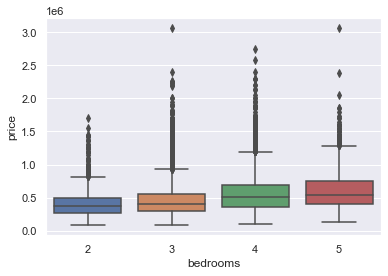

In [45]:
#bedrooms
sns.boxplot(x='bedrooms',y='price',data=df);

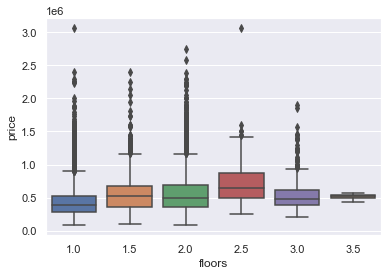

In [46]:
#No of floors in the house
sns.boxplot(x='floors',y='price',data=df);


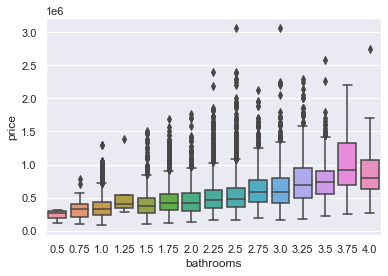

In [47]:
#Bathrooms
sns.boxplot(x='bathrooms',y='price',data=df);

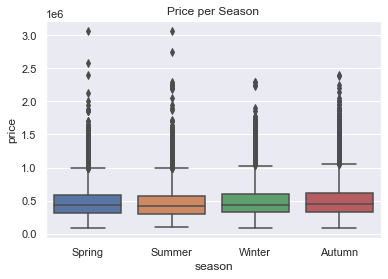

In [48]:
#Season Sold
sns.boxplot(x='season',y='price',data=df)
plt.title("Price per Season");

## 4.2.3 Summary:


We can conclude that:

`sqft_living` and `sqft_lot15` and `sqft_above`seem to be linearly related with `price`. Both relationships are positive, which means that as one variable increases, the other also increases. In the case of `sqft_living`, we can see that the slope of the linear relationship is particularly high.

`bathrooms`, `bedrooms`, `floors`, `condition`, `season` and `grade` also seem to be related with `price`. The relationship seems to be stronger in the case of 'bathrooms', where the box plot shows how prices increase with the number of bathrooms.

# 5. Modelling

In [49]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
import scipy.stats as stats


### 5.1 Simple Linear Regression

In [50]:
# specifying the variables
X = df[["sqft_living"]]
y = df["price"]

With StatsModels, the "model" is the result of calling the OLS constructor function.

We will also use the add_constant method because StatsModels expects a column of constant values if there should be a constant in the resulting regression.

In [51]:
# Creating a Model
'''
With StatsModels, the "model" is the result of calling the OLS constructor function.

We will also use the add_constant method because StatsModels expects a column of constant values if there should be a constant in the resulting regression.
'''
model_1 = sm.OLS(endog=y, exog=sm.add_constant(X))
model_1

In [52]:
#Fitting the Model
'''
Once we have a model, we call the `fit` method, which returns a results object.
'''
results_1 = model_1.fit()
results_1

In [53]:
# Model parameter confidence intervals:
print(results_1.conf_int())

                        0             1
const        67076.730924  83800.023484
sqft_living    209.545775    217.679154


Our 95% confidence interval for the intercept is about 75255.625500 to about 92071.951674. 

Our 95% confidence interval for the coefficient of sqft_living is about 204.410411 to about 212.733685

In [54]:
# To get a summary of the results
print(results_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                 1.060e+04
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        01:05:20   Log-Likelihood:            -2.7005e+05
No. Observations:               19801   AIC:                         5.401e+05
Df Residuals:                   19799   BIC:                         5.401e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.544e+04   4265.964     17.684      

##### Mean Absolute Error

In [55]:
#calculating the mean absolute error of the model:
MAE=results_1.resid.abs().sum()/len(y)
MAE

147362.2066905783

##### Model Summary

Looking at the summary above, we can see that the regression line we found was


$$ \hat{price} = 75440 + 213.61  sqft_living $$

* The model is statistically significant overall, with an F-statistic p-value well below 0.05
* The model explains about 35% of the variance in price
* The model coefficients (`const` and `sqft_living`) are both statistically significant, with t-statistic p-values well below 0.05
* If a house had 0 ft living space, we would expect price to be about 83660
* For each increase of 1 sqft in living space, we see an associated increase in price of about 213

#### Plotting Fit

This method shows the scatter plot of actual values as well as points indicating the values predicted by the model. The black vertical lines represent the confidence intervals for each prediction.

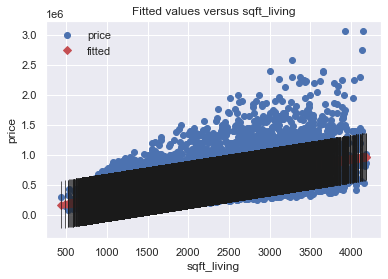

In [56]:
# plotting the actual vs. predicted values:
sm.graphics.plot_fit(results_1, "sqft_living")
plt.show()

To add a best-fit line to a regular scatter plot, for better visualization:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


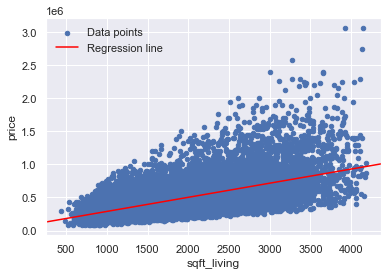

In [57]:
# The regression line:
fig, ax = plt.subplots()
df.plot.scatter(x="sqft_living", y="price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=results_1, label="Regression line", color = "red", ax=ax)
ax.legend();

#### Plotting Residuals

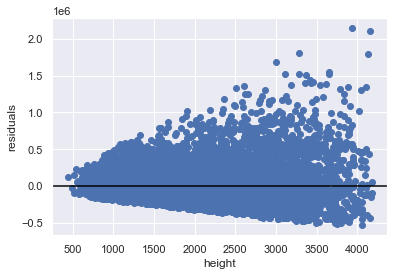

In [58]:
#The most typical way to plot the model residuals is like this:
fig, ax = plt.subplots()

ax.scatter(df["sqft_living"], results_1.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("height")
ax.set_ylabel("residuals");

Another tool we might use to visualize the distribution of the residuals is called a Q-Q plot. It compares the quantiles of the residuals to the quantiles of a theoretical normal distribution. The farther from the line that the data points appear, the farther from a normal distribution they are.

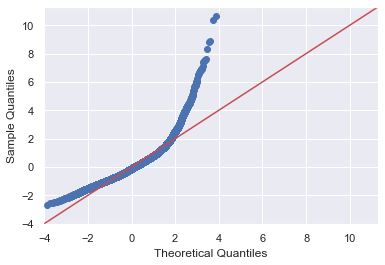

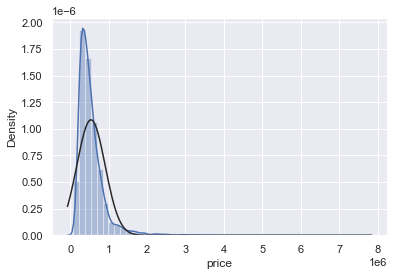

In [59]:
from scipy.stats import norm
sm.graphics.qqplot(results_1.resid, dist=stats.norm, line='45', fit=True)
plt.show()
sns.distplot(data['price'], fit=norm);


`price` is not normal. It shows 'peakedness', positive skewness and does not follow the diagonal line. 
A simple data transformation can solve the problem, in this case of positive skewness, log transformations usually works well.

In [60]:
#applying log transformation
data["log_price"] = np.log(data['price'])

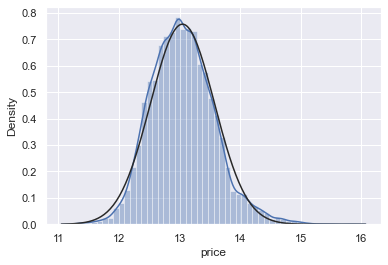

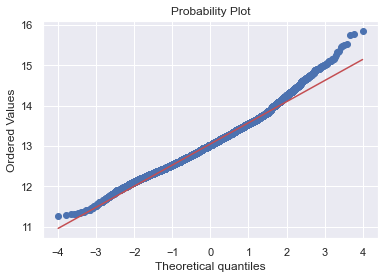

In [61]:
#transformed histogram and normal probability plot
sns.distplot(np.log(data['price']), fit=norm);
fig = plt.figure()
res = stats.probplot(np.log(data['price']), plot=plt)

### 5.2 Multiple Linear Regression

### 5.2.1 Model 1

In [62]:
X_second =  df[["sqft_living", 'bedrooms']]
X_second


sqft_living  bedrooms
0             1180         3
1             2570         3
2              770         2
3             1960         4
4             1680         3
...            ...       ...
19796         1530         3
19797         2310         4
19798         1020         2
19799         1600         3
19800         1020         2

[19801 rows x 2 columns]

In [63]:
model_2 = sm.OLS(y, sm.add_constant(X_second))
results_2 = model_2.fit()

print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     5590.
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        01:05:23   Log-Likelihood:            -2.6987e+05
No. Observations:               19801   AIC:                         5.397e+05
Df Residuals:                   19798   BIC:                         5.398e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.636e+05   6195.460     26.400      

In [64]:
# Model parameter confidence intervals:
print(results_2.conf_int())

                         0              1
const        151418.011796  175705.254468
sqft_living     237.720934     247.685312
bedrooms     -48201.735900  -39376.458398


Our 95% confidence interval for the intercept is about 151418.011796 to about 175705.254468. 

Our 95% confidence interval for the coefficient of sqft_living is about 237.720934 to about 247.685312

Our 95% confidence interval for the coefficient of bedrooms is about -48201.735900 to about -39376.458398

##### Mean Absolute Error

In [65]:
#calculating the mean absolute error of the model:
MAE=results_2.resid.abs().sum()/len(y)
MAE

145366.54201232293

##### Model Summary

Looking at the summary above, we can see that the regression line we found was


$$ \hat{price} = 163600 + 242.703 sqft_living  -43790 bedrooms $$

* The model is statistically significant overall, with an F-statistic p-value well below 0.05
* The model explains about 36% of the variance in price
* The model coefficients (`const` and `sqft_living` and `bedrooms`) are both statistically significant, with t-statistic p-values well below 0.05
* For each increase of 1 sqft in living space, we see an associated increase in price of about 243
* For each increase in 1 bedroom, we see an associated decrease in price of about 43790

#### Plotting Fit

This method shows the scatter plot of actual values as well as points indicating the values predicted by the model. The black vertical lines represent the confidence intervals for each prediction.

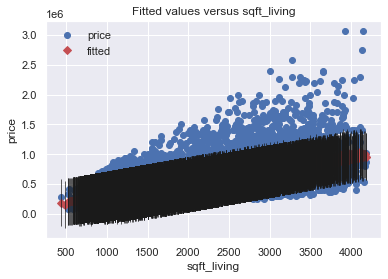

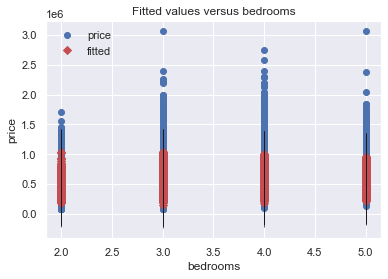

In [66]:
# plotting the actual vs. predicted values:
sm.graphics.plot_fit(results_2, "sqft_living")
plt.show()
sm.graphics.plot_fit(results_2, "bedrooms")
plt.show()

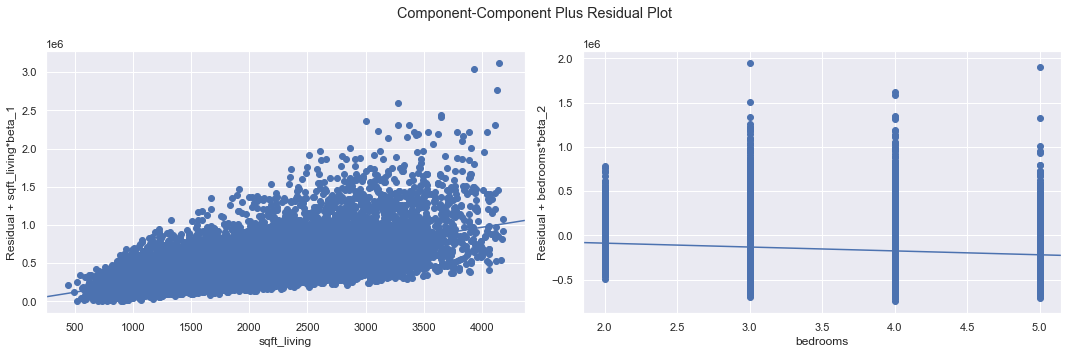

In [67]:
# Plotting the regression line for better visualization
fig = plt.figure(figsize=(15,5))
sm.graphics.plot_ccpr_grid(results_2, exog_idx=["sqft_living", "bedrooms"], grid=(1,2), fig=fig)
plt.tight_layout()
plt.show()


Another approach is using a component and component-plus-residual plot, also known as a CCPR plot. A CCPR plot is a refinement of a partial residual plot. A partial residual plot is a scatter plot with the predictor on the x-axis and the model residuals plus the predictor times its coefficient on the y-axis. Then the CCPR plot also includes a line representing the fitted line of the predictor times its coefficient. Similar to a partial regression plot, you are essentially looking for the points and best-fit line to match up and form a linear relationship with non-zero slope.

##### Plotting Residuals

This is done by plotting the value of the predictor on the x-axis vs. the model residuals on the y-axis.

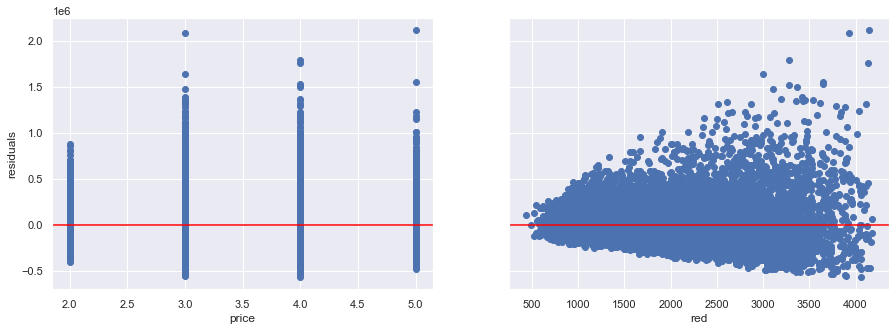

In [68]:
fig, axes = plt.subplots(ncols=2, figsize=(15,5), sharey=True)
weight_ax = axes[0]
weight_ax.scatter(df["bedrooms"], results_2.resid)
weight_ax.axhline(y=0, color="red")
weight_ax.set_xlabel("price")
weight_ax.set_ylabel("residuals")
year_ax = axes[1]
year_ax.scatter(df["sqft_living"], results_2.resid)
year_ax.axhline(y=0, color="red")
year_ax.set_xlabel("red");


eval_env: 1
eval_env: 1


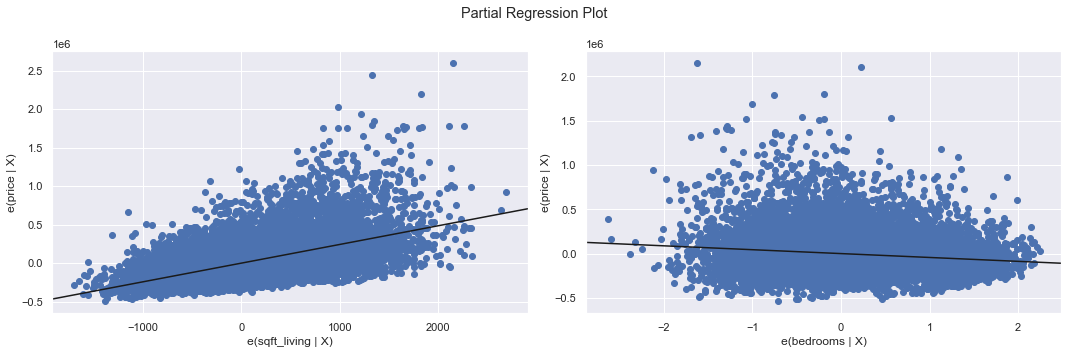

In [69]:
#CCPR line
fig = plt.figure(figsize=(15,5))
sm.graphics.plot_partregress_grid(results_2, exog_idx=["sqft_living", "bedrooms"], fig=fig)
plt.tight_layout()
plt.show()

This may initially appear similar to the plotted regression line from our simple linear regression above, but it is not actually showing the predictor value on the x-axis vs. the target value on the y-axis. Instead, the goal is to show the marginal contribution of this particular predictor.
A reasonable conclusion to reach, looking at these plots, is that both predictors are useful and should be included in the mode

#### Plotting partial regression plots

eval_env: 1


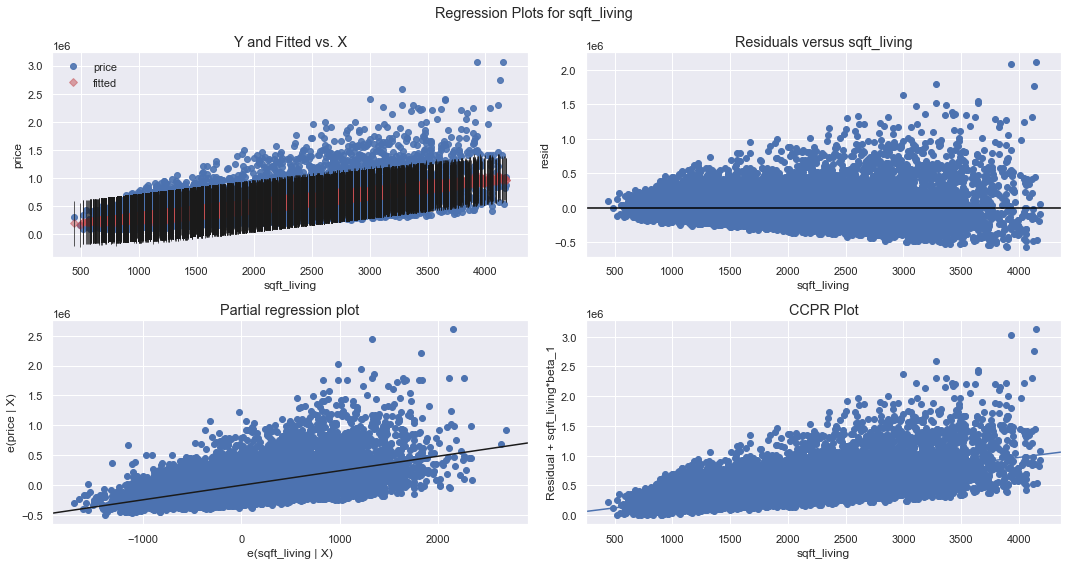

In [70]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(results_2, "sqft_living", fig=fig)
plt.show()

eval_env: 1


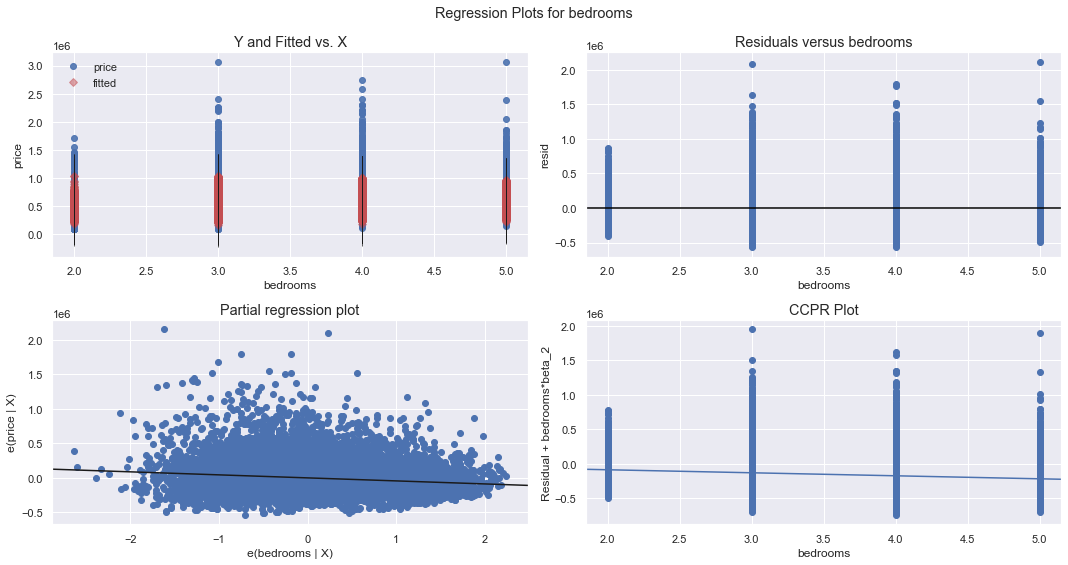

In [71]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(results_2, "bedrooms", fig=fig)
plt.show()

In [72]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'condition', 'grade', 'sqft_above', 'yr_built', 'lat', 'long',
       'sqft_living15', 'month', 'year', 'season'],
      dtype='object')

### 5.2.1 Model 2

In [73]:
X_all = df.drop("price", axis=1).select_dtypes("number")

In [74]:
model_3 = sm.OLS(y, sm.add_constant(X_all))
results_3 = model_3.fit()

print(results_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     2192.
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        01:05:31   Log-Likelihood:            -2.6593e+05
No. Observations:               19801   AIC:                         5.319e+05
Df Residuals:                   19788   BIC:                         5.320e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9.571e+07   8.21e+06    -11.659

##### Mean Absolute Error

In [75]:
#calculating the mean absolute error of the model:
MAE=results_2.resid.abs().sum()/len(y)
MAE

145366.54201232293

#### Model Summary

Looking at the summary above, we can see that the regression line we found was

* The model is statistically significant overall, with an F-statistic p-value well below 0.05
* The model explains about 57% of the variance in price
* A majority model coefficients are statistically significant, with t-statistic p-values well below 0.05
* For this model `month` and `sqft above` are not  statistically significant
* For each increase of 1 sqft in `sqft_living`, we see an associated increase in price of about 156
* For each increase in 1 bedroom, we see an associated decrease in price of about 35960

#### Plotting Fit

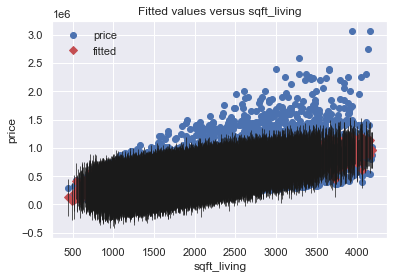

In [76]:
sm.graphics.plot_fit(results_3, "sqft_living")
plt.show()

### 5.2.1 Model 3

###  One Hot Encoding

In [77]:
encoded = df[["condition", "grade", "season", 'view']].copy()
encoded.sample(10, random_state=1)

condition          grade  season  view
16447    Average       9 Better  Winter  NONE
2219     Average      7 Average  Autumn  NONE
2395   Very Good  6 Low Average  Winter  NONE
6349     Average         8 Good  Autumn  NONE
3518     Average      7 Average  Summer  NONE
3832     Average      7 Average  Spring  NONE
7693     Average      7 Average  Summer  NONE
942         Good         8 Good  Summer  NONE
11126    Average      7 Average  Winter  NONE
18730    Average       9 Better  Summer  NONE

In [78]:
y = df["price"]
#X_all = df.drop("price", axis=1).select_dtypes("number")
X = df[["sqft_above", "sqft_living", "sqft_living15", "floors", "bathrooms", "bedrooms", "season", "yr_built", "lat","long","condition", "grade", 'view']]
X

sqft_above  sqft_living  sqft_living15  floors  bathrooms  bedrooms  \
0            1180         1180           1340     1.0       1.00         3   
1            2170         2570           1690     2.0       2.25         3   
2             770          770           2720     1.0       1.00         2   
3            1050         1960           1360     1.0       3.00         4   
4            1680         1680           1800     1.0       2.00         3   
...           ...          ...            ...     ...        ...       ...   
19796        1530         1530           1530     3.0       2.50         3   
19797        2310         2310           1830     2.0       2.50         4   
19798        1020         1020           1020     2.0       0.75         2   
19799        1600         1600           1410     2.0       2.50         3   
19800        1020         1020           1020     2.0       0.75         2   

       season  yr_built      lat     long  condition          grade  view  
0      Spring      1955  47.5112 -122.257    Average      7 Average  NONE  
1      Summer      1951  47.7210 -122.319    Average      7 Average  NONE  
2      Summer      1933  47.7379 -122.233    Average  6 Low Average  NONE  
3      Summer      1965  47.5208 -122.393  Very Good      7 Average  NONE  
4      Summer      1987  47.6168 -122.045    Average         8 Good  NONE  
...       ...       ...      ...      ...        ...            ...   ...  
19796  Autumn      2009  47.6993 -122.346    Average         8 Good  NONE  
19797  Summer      2014  47.5107 -122.362    Average         8 Good  NONE  
19798  Winter      2009  47.5944 -122.299    Average      7 Average  NONE  
19799  Summer      2004  47.5345 -122.069    Average         8 Good  NONE  
19800  Spring      2008  47.5941 -122.299    Average      7 Average  NONE  

[19801 rows x 13 columns]

In [79]:
X = pd.get_dummies(X, columns=["condition", "grade","season", "view"],drop_first=True)

In [80]:
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     1438.
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        01:05:32   Log-Likelihood:            -2.6330e+05
No. Observations:               19801   AIC:                         5.267e+05
Df Residuals:                   19772   BIC:                         5.269e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2.609e+07   1

##### Mean Absolute Error

In [81]:
#calculating the mean absolute error of the model:
MAE=results.resid.abs().sum()/len(y)
MAE

99310.95106534802

#### Model Summary

* Standard Errors assume that the covariance matrix of the errors is correctly specified.

* The model is statistically significant overall, with an F-statistic p-value well below 0.05

* The model explains about 67% of the variance in price.

* The value of our R_squared constantly increase as we add more predictors. The fact that we went from an R-Squared by 35% to 67% is an indicator that this is a good model.

* Nearly all of the model coefficients have p-values less than 0.05 and are thus statistically significant.

* The last model would be an ideal in predicting the current and future prices of the house since it has the highest accuracy(67%).



###  5.3 Limitations of the model

The model perform poorly with the variables that are not linea because linear regression assumes a linear relationship between the input and output variables


# 6. RECOMMENDATIONS AND CONCLUSION

* I would recommend that the Agency adopt the last model since it has a higher r_squared value of 0.67 which translates to 67% accuracy of the model.

* By using this model the Agency is able to offer advice to the homeowners which will inturn help them maximize profits.

* Features such as `condition` , `bedrooms`, `bathroom`s,`sqft_living15` and `sqft_living` of the house should be put into consideration because they affect prices positively .

* I would also recommend the Agency that they advice the homeowners to improve features such as `waterfront`, `view` as they have a great impact to the house prices as well.